In [79]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import datetime

**Import Data**

In [2]:
#import data (March'18-May'18) ffrom MTA turnstile data from(http://web.mta.info/developers/turnstile.html)
SEARCH_TYPE = 'Spring'     # 'None' to suppress this cell
if SEARCH_TYPE=='Spring':  # SMB: files sometimes don't load, so added try: below
    TURNSTILE_PATH = 'http://web.mta.info/developers/data/nyct/turnstile/'
    TURNSTILE_FILES = ['turnstile_180310','turnstile_180317','turnstile_180324','turnstile_180331']
    turnstile_files = [TURNSTILE_PATH + x + '.txt' for x in TURNSTILE_FILES]

    tflist = []
    for tf in turnstile_files:
        print(f'Opening file {tf[-20:]}')
        try:
            df = pd.read_csv(tf, index_col=None, header=0)
            tflist.append(df)
        except:
            print(f'  Trouble accessing file -> skipping.')
    data_nyc_turnstile = pd.concat(tflist)
    
#
    data_nyc_turnstile.columns = data_nyc_turnstile.columns.str.replace(' ', '')

else:
    print('MTA data not loaded; "data_nyc_turnstiles" was not refreshed.')

Opening file turnstile_180310.txt
Opening file turnstile_180317.txt
Opening file turnstile_180324.txt
Opening file turnstile_180331.txt


**Challenge 1**

Open up a file, use csv reader to read it and ensure there is a column for each feature (C/A, UNIT, SCP, STATION). These are the first four columns.

In [3]:
data_nyc_turnstile.columns

Index(['C/A', 'UNIT', 'SCP', 'STATION', 'LINENAME', 'DIVISION', 'DATE', 'TIME',
       'DESC', 'ENTRIES', 'EXITS'],
      dtype='object')

**Challenge 2**

Create a new column that specifies the date and time of each entry.

In [5]:
data_nyc_turnstile['Date_time'] = data_nyc_turnstile['DATE'] + ' ' + data_nyc_turnstile['TIME']

#Converting ['Date_time'] to datetime64 series
data_nyc_turnstile['DATETIME'] = pd.to_datetime(data_nyc_turnstile['Date_time'], format="%m/%d/%Y %H:%M:%S")
data_nyc_turnstile.drop('Date_time', axis=1, inplace=True)
data_nyc_turnstile.head()

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,DATETIME
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,03/03/2018,03:00:00,REGULAR,6535802,2213345,2018-03-03 03:00:00
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,03/03/2018,07:00:00,REGULAR,6535813,2213356,2018-03-03 07:00:00
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,03/03/2018,11:00:00,REGULAR,6535865,2213436,2018-03-03 11:00:00
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,03/03/2018,15:00:00,REGULAR,6536048,2213481,2018-03-03 15:00:00
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,03/03/2018,19:00:00,REGULAR,6536326,2213531,2018-03-03 19:00:00


**Challenge 3**

Calculate to total daily entries for each turnstile.

In [6]:
data_nyc_new=data_nyc_turnstile.sort_values(by=['STATION', 'UNIT', 'C/A', 'SCP', 'DATETIME'])



In [7]:
data_nyc_new['DAILY_ENTRIES']=data_nyc_new['ENTRIES'].diff(periods=-1)*-1
data_nyc_new.head()


,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,DATETIME,DAILY_ENTRIES
30342,H007,R248,00-00-00,1 AV,L,BMT,03/03/2018,03:00:00,REGULAR,13272291,14824220,2018-03-03 03:00:00,42.0
30343,H007,R248,00-00-00,1 AV,L,BMT,03/03/2018,07:00:00,REGULAR,13272333,14824377,2018-03-03 07:00:00,394.0
30344,H007,R248,00-00-00,1 AV,L,BMT,03/03/2018,11:00:00,REGULAR,13272727,14825054,2018-03-03 11:00:00,704.0
30345,H007,R248,00-00-00,1 AV,L,BMT,03/03/2018,15:00:00,REGULAR,13273431,14826083,2018-03-03 15:00:00,779.0
30346,H007,R248,00-00-00,1 AV,L,BMT,03/03/2018,19:00:00,REGULAR,13274210,14827461,2018-03-03 19:00:00,582.0


In [8]:
data_nyc_new = data_nyc_new[(data_nyc_new['DAILY_ENTRIES'] >= 0) & (data_nyc_new['DAILY_ENTRIES'] < 100000)]

In [9]:
data_nyc_new.head()

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,DATETIME,DAILY_ENTRIES
30342,H007,R248,00-00-00,1 AV,L,BMT,03/03/2018,03:00:00,REGULAR,13272291,14824220,2018-03-03 03:00:00,42.0
30343,H007,R248,00-00-00,1 AV,L,BMT,03/03/2018,07:00:00,REGULAR,13272333,14824377,2018-03-03 07:00:00,394.0
30344,H007,R248,00-00-00,1 AV,L,BMT,03/03/2018,11:00:00,REGULAR,13272727,14825054,2018-03-03 11:00:00,704.0
30345,H007,R248,00-00-00,1 AV,L,BMT,03/03/2018,15:00:00,REGULAR,13273431,14826083,2018-03-03 15:00:00,779.0
30346,H007,R248,00-00-00,1 AV,L,BMT,03/03/2018,19:00:00,REGULAR,13274210,14827461,2018-03-03 19:00:00,582.0


**Challenge 4**

Plot the daily time series for a turnstile.

In [10]:
data_turnstile=data_nyc_new.groupby(['UNIT', 'C/A', 'SCP', 'DATETIME'])['DAILY_ENTRIES'].sum().reset_index()
data_turnstile.head()


,UNIT,C/A,SCP,DATETIME,DAILY_ENTRIES
0,R001,A058,01-00-00,2018-03-03 00:00:00,13.0
1,R001,A058,01-00-00,2018-03-03 04:00:00,8.0
2,R001,A058,01-00-00,2018-03-03 08:00:00,26.0
3,R001,A058,01-00-00,2018-03-03 12:00:00,58.0
4,R001,A058,01-00-00,2018-03-03 16:00:00,82.0


In [11]:
data_single_turnstile = data_turnstile[(data_turnstile['C/A'] == 'A058')
                                     & (data_turnstile['SCP'] == '01-00-00')]

Text(0,0.5,'Total Daily Entries')

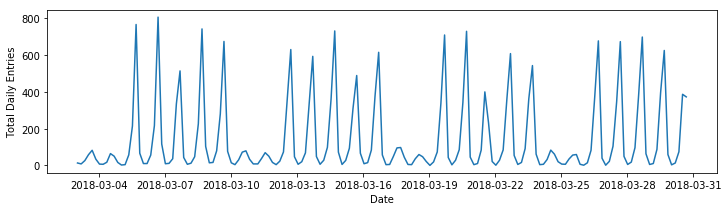

In [18]:
x=data_single_turnstile['DATETIME']
y=data_single_turnstile['DAILY_ENTRIES']

plt.figure(figsize=(12,3))
plt.plot(x,y)
plt.xlabel('Date')
plt.ylabel('Total Daily Entries')

**Challenge 5 and Challenge 6**

Combine the numbers together -- for each ControlArea/UNIT/STATION combo, for each day, add the counts from each turnstile belonging to that combo.

In [26]:
data_turnstile=data_nyc_new.groupby(['STATION', 'UNIT', 'C/A','DATETIME'])['DAILY_ENTRIES'].sum().reset_index()

data_turnstile = data_turnstile.set_index('DATETIME').groupby(['STATION','UNIT','C/A']).resample('D').sum().reset_index()
data_turnstile=data_turnstile.groupby(['STATION','DATETIME'])['DAILY_ENTRIES'].sum().reset_index()
data_turnstile.head()

,STATION,DATETIME,DAILY_ENTRIES
0,1 AV,2018-03-03,18310.0
1,1 AV,2018-03-04,12902.0
2,1 AV,2018-03-05,21506.0
3,1 AV,2018-03-06,22480.0
4,1 AV,2018-03-07,17187.0


**Challenge 7**

Plot the time series (either daily or your preferred level of granularity) for a station.

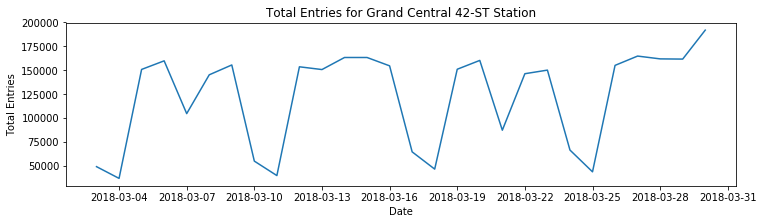

In [79]:
grand_central_data = data_turnstile[data_turnstile['STATION'] =='GRD CNTRL-42 ST']
x=grand_central_data['DATETIME']
y=grand_central_data['DAILY_ENTRIES']
plt.figure(figsize=(12,3))
plt.title('Total Entries for Grand Central 42-ST Station')
plt.xlabel('Date')
plt.ylabel('Total Entries')
plt.plot(x,y)


**Challenge 8**

Select a station and find the total daily counts for this station. Then plot those daily counts for each week separately.

In [38]:
data_turnstile['WEEK_DAY']=data_turnstile['DATETIME'].dt.dayofweek
data_turnstile['WEEK_NUMBER']=data_turnstile['DATETIME'].dt.week
data_turnstile.head()
                                     

,STATION,DATETIME,DAILY_ENTRIES,WEEK_DAY,WEEK_NUMBER
2,1 AV,2018-03-05,21506.0,0,10
3,1 AV,2018-03-06,22480.0,1,10
4,1 AV,2018-03-07,17187.0,2,10
5,1 AV,2018-03-08,22888.0,3,10
6,1 AV,2018-03-09,25963.0,4,10


In [23]:
#data_turnstile['WEEK_NUMBER']=data_turnstile['DATETIME'].dt.week
#data_turnstile.head()

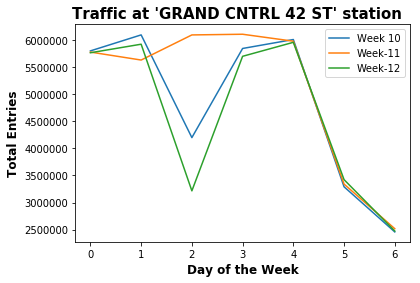

In [81]:
#Selecting a station

data_grand_central=data_turnstile[data_turnstile['STATION'] =='GRD CNTRL-42 ST']
data_grand_central=data_turnstile[data_turnstile['WEEK_NUMBER']<13]
data_grand_central=data_grand_central.groupby(['WEEK_NUMBER','WEEK_DAY'])['DAILY_ENTRIES'].sum().reset_index()
data_grand_central
legend =['Week 10','Week-11','Week-12']
# defining weeks
list_of_weeks=[10,11,12]
for i in list_of_weeks:
    x=data_grand_central.loc[data_grand_central['WEEK_NUMBER']==i,'WEEK_DAY']
    y=data_grand_central.loc[data_grand_central['WEEK_NUMBER']==i,'DAILY_ENTRIES']
    plt.plot(x,y)
    
plt.ylabel("Total Entries",fontsize = 12, weight = 'bold')
plt.xlabel("Day of the Week",fontsize = 12, weight = 'bold')
plt.title("Traffic at 'GRAND CNTRL 42 ST' station  ",fontsize = 15, weight = 'bold')
plt.legend(legend, loc ='best', fontsize=10)

    
    


In [57]:
#temp = data_grand_central[data_grand_central['WEEK_NUMBER']==11]
#plt.plot(temp['WEEK_DAY'],temp['DAILY_ENTRIES'])

**Challenge 9**

Over multiple weeks, sum total ridership for each station and sort them, so you can find out the stations with the highest traffic during the time you investigate

In [44]:
data_turnstile_station_total=data_turnstile.groupby(['STATION'])['DAILY_ENTRIES'].sum().reset_index()
data_turnstile_station_total.sort_values(['DAILY_ENTRIES'],ascending=False,inplace=True)
data_turnstile_station_total.head(10)

,STATION,DAILY_ENTRIES
60,34 ST-PENN STA,3721108.0
230,GRD CNTRL-42 ST,3345363.0
46,23 ST,2620742.0
58,34 ST-HERALD SQ,2524099.0
14,14 ST-UNION SQ,2420786.0
348,TIMES SQ-42 ST,2414783.0
223,FULTON ST,2334485.0
66,42 ST-PORT AUTH,2119058.0
108,86 ST,1976678.0
171,CANAL ST,1712709.0


**Challenge 10**



Text(0,0.5,'Count Of Stations')

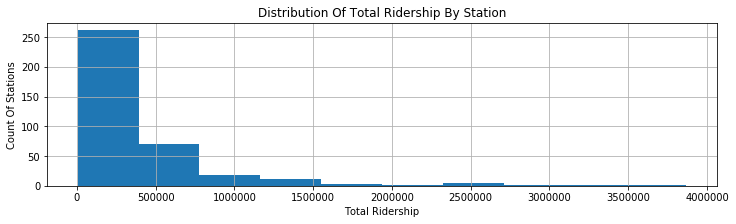

In [84]:

data_turnstile_station_total.hist(figsize=(12,3))
plt.title('Distribution Of Total Ridership By Station')
plt.xlabel('Total Ridership')
plt.ylabel('Count Of Stations')
